In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl

In [3]:
file = pd.read_csv('../output/scores/experiments/binding_time_dataset.csv')

In [4]:
specific_condition = ['WT, G1','WT']

# Use boolean indexing to filter rows with 'cell type' column matching specific values
filtered_df = file[file['condition'].isin(specific_condition)]

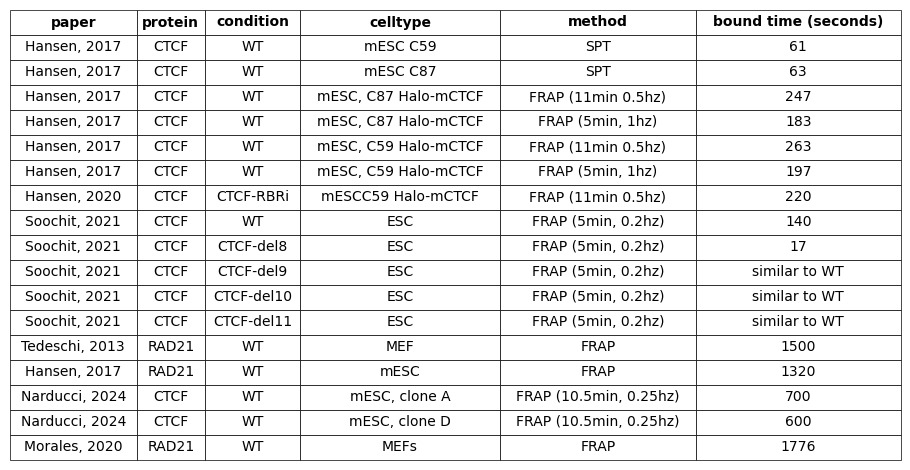

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('tight')
ax.axis('off')
font_size = 10
table_s = file.dropna(subset=['paper'])
table = ax.table(cellText=table_s.values, colLabels=table_s.columns, loc='center', cellLoc='center', fontsize=10)

table.auto_set_font_size(False)
table.set_fontsize(font_size)

# Enable text wrapping for all cells
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(fontweight='bold')
    cell.set_linewidth(0.5)
    cell.set_edgecolor('black')
    cell.set_text_props(wrap=True)  # Enable text wrapping

# Increase the height of the rows in the table
cell_height = 0.1  # Adjust this value as needed
table.scale(1, 1.5)  # Increase row height by a factor of 3

# Set the width of the 'celltype' column to be wider than the rest
col_widths = [0.1, 0.2, 0.1, 0.1, 0.1, 0.1]  # Adjust the width of each column as needed
for i, width in enumerate(col_widths):
    table.auto_set_column_width(col=i)
#table.set_col_width(1, 0.2)  # Set the width of the 'celltype' column

plt.savefig('../output/figures/lifetime_table_modified.pdf', format='pdf', bbox_inches='tight')
plt.show()


### plots

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "ppt" which is no longer supported as of 3.3 and will become an error in 3.6


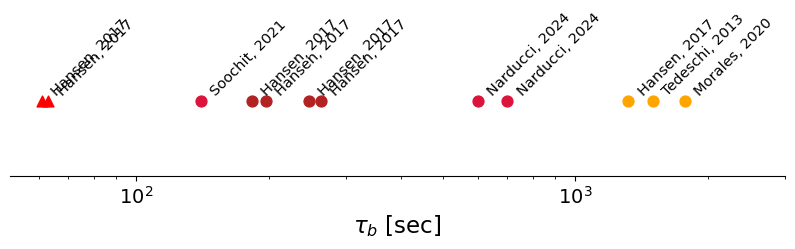

In [7]:
table_s= file[file['condition']=='WT']

table_s['bound time (seconds)']=pd.to_numeric(table_s['bound time (seconds)'])
plt.figure(figsize=(10,1.95))

for i in range(len(table_s)):
    if table_s.iloc[i]['protein']=='CTCF':
        if table_s.iloc[i]['method']=='SPT':
            color = 'red'
            marker = '^'
        else:
            if table_s.iloc[i]['paper']=='Hansen, 2017':
                color = 'firebrick'
                marker = 'o'
            else:
                color = 'crimson'
                marker = 'o'
    else:
        color = 'orange'
        marker = 'o'
        
    xytext=(5,4.15)
    #print(table_s.iloc[i]['bound time (seconds)'])
    plt.scatter( pd.to_numeric(table_s.iloc[i]['bound time (seconds)']),0.81,
                color=color, marker=marker, s= 61)

    plt.annotate('%s' % ( table_s.iloc[i]['paper']),
                 ( table_s.iloc[i]['bound time (seconds)'],0.81),
                 textcoords="offset points", xytext=xytext, ha='left', fontsize=10.51, rotation=45)
    
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.xlabel(r'$\tau_b$ [sec]', fontsize=16.5)
plt.xscale('log')
plt.xlim(0, 3000)
plt.xticks(fontsize=11.95)
plt.yticks([])


mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False
plt.xticks(fontsize=14.05)
plt.savefig('../output/figures/experimental_for_binding.pdf',transparent=True, ppt=300,bbox_inches='tight')
plt.show()


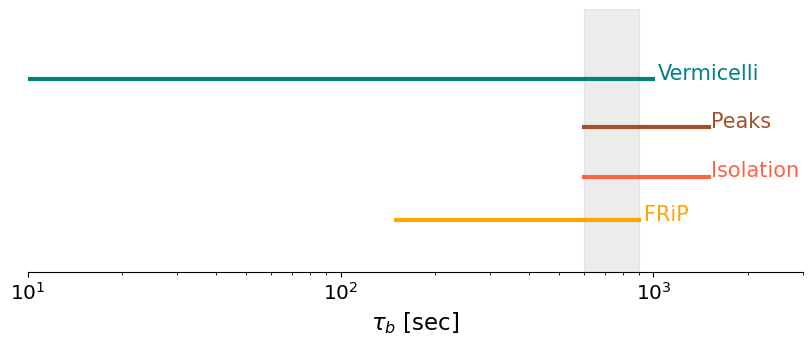

In [8]:
plt.figure(figsize=(10,3.41))

plt.axvspan(600, 900, color='grey', alpha=0.15)


# FRIP
Frip = [150, 900]
y_frip = 1
deltex = 31
delty = 0.035
plt.plot(Frip, [y_frip] * len(Frip), label='FRiP', linewidth=3, color='orange')
plt.annotate('FRiP', (np.max(Frip) + deltex, y_frip), color='orange', fontsize=15)

# Isolation
iso = [600, 1500]
y_iso = 1.85
#deltex = 15
plt.plot(iso, [y_iso, y_iso], label='Tads', linewidth=3, color='tomato')
plt.annotate('Isolation', (iso[1] + deltex, y_iso), color='tomato', fontsize=15)


# Dots
dots = [600, 1500]
y_dot = 2.81
plt.plot(dots, [y_dot, y_dot], label='Tads', linewidth=3, color='sienna')
plt.annotate('Peaks', (np.max(dots) + deltex, y_dot), color='sienna', fontsize=15)

# Vermicelli
verm = [0, 1000]
y_verm =3.75
plt.plot(verm, [y_verm, y_verm], label='Tads', linewidth=3, color='teal')
plt.annotate('Vermicelli', (np.max(verm) + deltex, y_verm), color='teal', fontsize=15)
plt.scatter(0, 30, alpha=1)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([])
plt.xlabel(r'$\tau_b$ [sec]', fontsize=16.5)
plt.xlim(10, 3000)
plt.xscale('log')

plt.yticks([])
plt.xticks(fontsize=14.5)
plt.ylim(0, 5.1)
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False

plt.savefig('../output/figures/summary_for_estimation.pdf', dpi=300, bbox_inches='tight')
plt.show()
